Convolutional Neural Networks, or CNNs, are specialized architectures which work particularly well with visual data, i.e. images and videos. They have been largely responsible for revolutionizing 'deep learning' by setting new benchmarks for many image processing tasks that were very recently considered extremely hard. Although the vanilla neural networks (MLPs) can learn extremely complex functions, their architecture does not exploit what we know about how the brain reads and processes images. For this reason, although MLPs are successful in solving many complex problems, they haven't been able to achieve any major breakthroughs in the image processing domain. 

### Reading Digital Images

An input to any neural network should be numeric. Images are naturally represented as arrays (or matrices) of numbers.

### Greyscale Images

Images are made up of pixels. For most images, pixel values are integers that range from 0(black) to 255(white). The range 0-255 represents the colour intensity of each pixel.

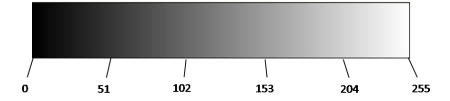

Above figure represents 18x18 greyscale image of ‘0’ and corresponding matrix.

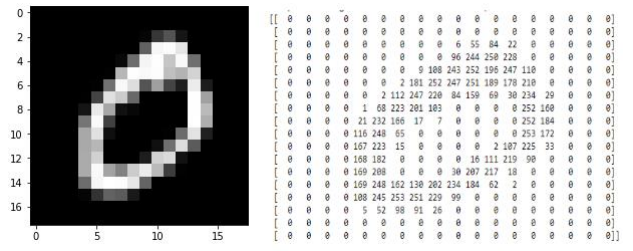

### Colour Images

All colours can be made by mixing red, blue and green at different degrees of “saturation” (0 -100% intensity) as you can see in Figure below. For example, a pure red pixel has 100% intensity of red, and 0% intensity of blue and green. So, it is represented as (255,0,0). White is the combination of 100% intensity of red, green and blue. So, it is represented as (255,255,255).

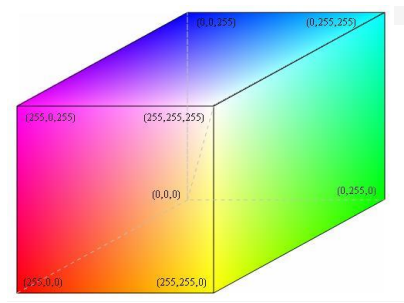


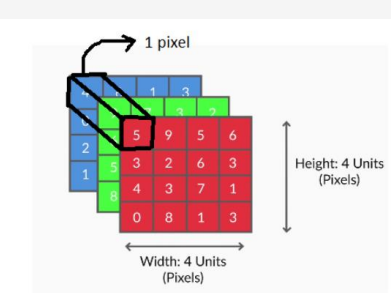



### Convolution

Mathematically, the convolution operation is the summation of the element-wise product of two matrices. Let’s take two matrices, X and Y. If you 'convolve the image X using the filter Y', this operation will produce the matrix Z. Let’s say when we have X and Y of the same dimension. 

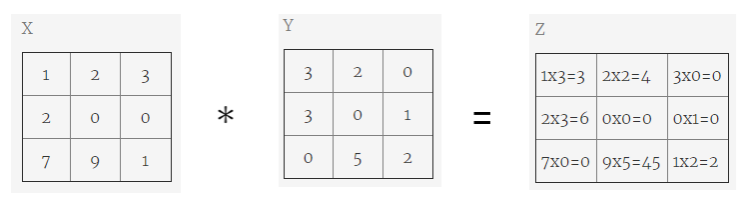

Let’s see another case when Image size is 5x5 and filter size is 3x3.

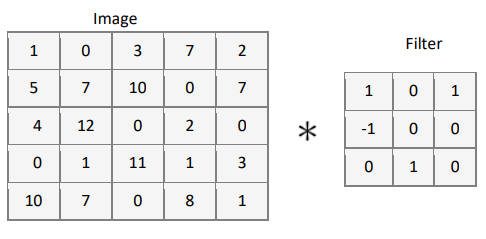

You can see the result of convolution in figure below

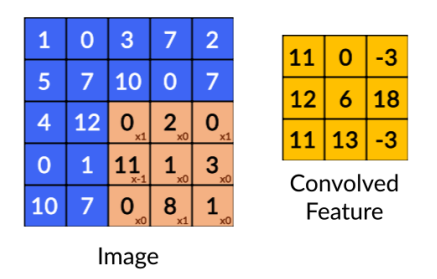

The basic idea of filters is to detect desired features (such as vertical or horizontal edges) through convolution. In the Figure below, filter extracts edge present in the image.

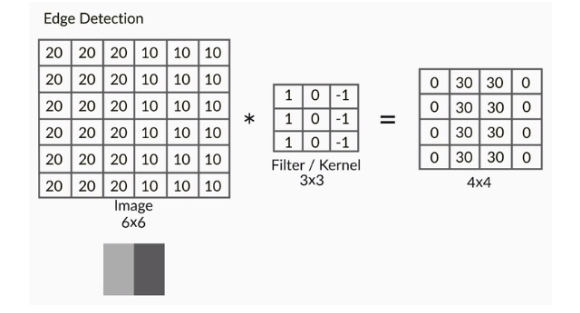

### Convolution in Depth

Let’s take image with RGB channel as in Figure 8 and convolve with their corresponding filters. The result is shown in Figure 9. 

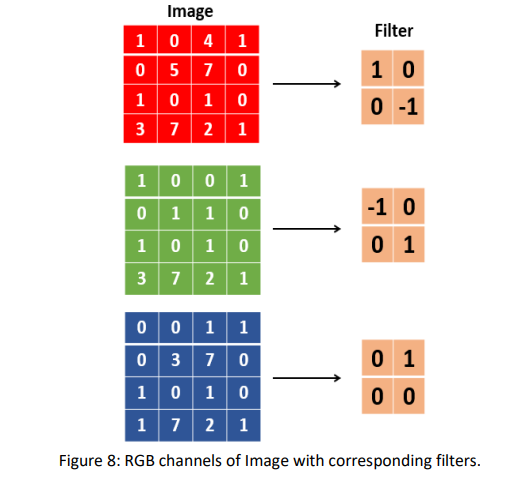

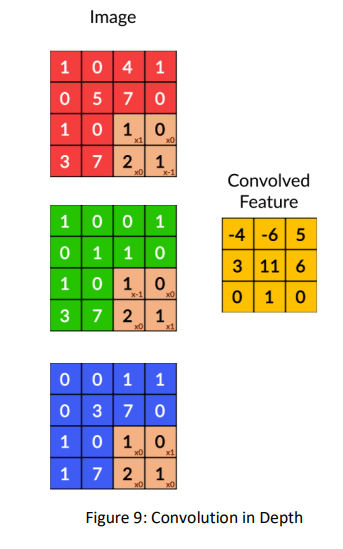

#### Input, Filter and Output Dimension

In convolution, the number of filters should match the depth of the image. Say if we have a greyscale image with depth of 1 of size 10x10, the filter also needs to have the depth of 1 of size say 5x5. In case of a colour image with RGB channel, say an image of size 10x10x3 where 3 is the depth, we need a filter of dimension 5x5x3 where the depth of 3 is present in both the image and the filter. It is also to be noted that the result of convolution is a 2D array/matrix, irrespective of the depth of the input. So, if we use multiple filters, there will be multiple 2D array/matrix and we can stack them up. 

#### Problem with reducing spatial dimension (height and width) in convolution

If we want to make a very deep convolutional neural network with lots of convolutional layers, the spatial dimension will reduce with each convolutional operation, and we may not be able to make the layers deep enough. But we also want a compact representation of the image for classification. To overcome this problem, we designed a schema in which the spatial dimension of the input should be preserved with each convolutional operation through the choice of proper stride and padding while reducing the representation periodically through pooling. So, the pooling layer alone is responsible for down-sampling the volume spatially. 

### Stride and Padding

**Stride:** Stride is the number of pixels we move the filter (both horizontally and vertically) to perform convolution operation.

**Padding:** Padding is the number of pixels we add all around the image. As you can in Figure 10 that the padding of 1 is used. 

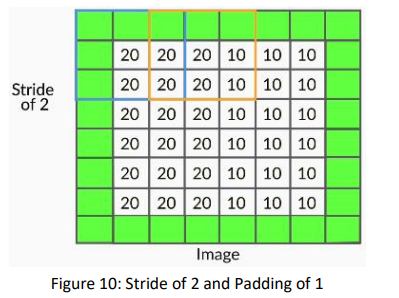


#### Why we use a stride of 1 in convolution?

Moving filter with smaller stride helps to capture more fine-grained information, Also, moving with larger stride helps to reduce the total number of operations in convolution and reduce the spatial dimension. But, when we are just interested in capturing more fine-grained features, and pooling layer takes care of reducing the spatial dimension, so we use a stride of 1.

#### Why use padding?

Padding operation helps to maintain the height and width of the output (same as input) that we get after the convolution. Also, it helps to preserve the information at the borders. There are also alternate ways to do convolution by reducing the filter size as we approach the edge, but they are not common. **Zero-padding:** Padding image with ‘0’ all around the image. 

### Weights in CNN

In the case of the neural network, we don’t define a specific filter. We just initialize the weights and they are learned during backpropagation. In Figure 8, the filter has three channels, and each channel of the filter convolves to the corresponding channel of the image. Thus, each step in the convolution involves the element-wise multiplication of 12 (4 operations in each RGB) pairs of numbers and adding the resultant products to get a single scalar output. Note that in each step, a single scalar number is generated, and at the end of the convolution, a 2D array is generated.

You can express the convolution operation as a dot product between the weights and the input image. If you treat the (2, 2, 3) filter as a vector w of length 12, and the 12 corresponding elements of the input image as the vector p (i.e. both unrolled to a 1D vector), each step of the convolution is simply the dot product of wT and p. The dot product is computed at every patch to get a (3, 3) output array, as shown above. Apart from the weights, each filter has only 1 also bias.

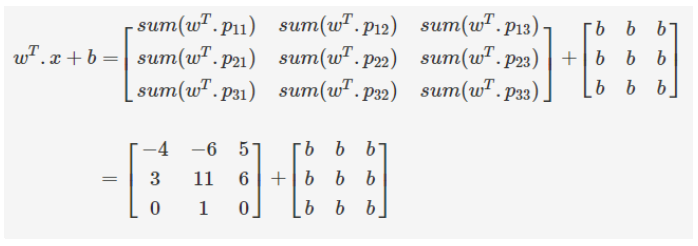

### Feature Map

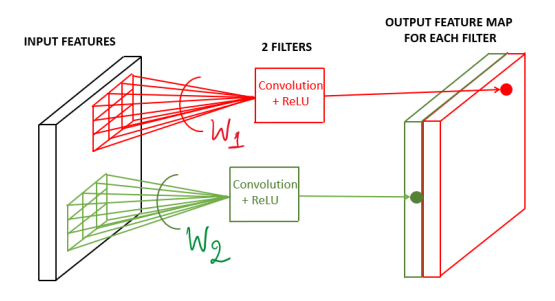

The term 'feature map' refers to the (non-linear) output of the activation function, not what goes into the activation function (i.e. the output of the convolution). Generally, ReLU is used as an activation function, except in the last layer where we use SoftMax activation for classification. 

### Pooling

After extracting features (as feature maps), CNNs typically aggregate these features using the pooling layer to make the representation more compact. We already used padding to make the width and height of feature map same as that of input. But we also need compact representation of the feature map. We take aggregate over a patch of feature map to get the output of pooling. Most popular are ‘Max Pooling’ and ‘Average Pooling’. Max pooling is more popular than average pooling as it has shown to work better average pooling.

**Max pooling:** If any one of the patches says something strongly about the presence of a certain feature, then the pooling layer counts that feature as 'detected'.

**Average pooling:** If one patch says something very firmly but the other ones disagree, the pooling layer takes the average to find out.

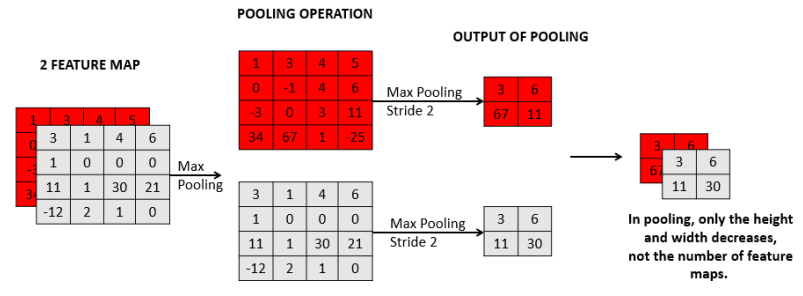

### Shared Weights

The concept of shared weights is used in the convolutional layers to control the number of parameters. It
means that same filter is used across the image when extracting a feature instead of changing weights at every
different position (x,y), as if the weights are shared across different positions. We make assumption that if one
filter extracts a feature at some spatial position (x,y), then it should also be useful to compute the same
feature at a different position (x1,y1).


### Flatten, Fully Connected and Softmax

#### Why we need to Flatten?

The output of the convolutional layer is 3-dimension matrix say 32x32x256. But for classification, we need a dense layer. Say, we if we want to classify an image into 5 classes, finally we need 5 neurons what will output probability. So, we need to convert the 3-dimensional matrix into fully connected. Generally, we use pooled feature map to convert into the dense layer.

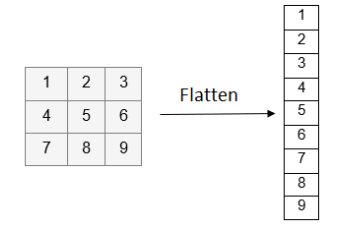

#### Why we need to Fully connected layer?

After flattening the layer, we need to look at all the features extracted by the convolutional layer before we classify them. So, we need the dense layer in which all neurons in the next layer is connected to all the neurons in the previous layer. On the top of fully connected, we use ‘softmax’ activation for classification. 

To summarise, there are three main concepts in CNNs:

* Convolution, and why it 'shrinks' the size of the input image
* Pooling layers
* Feature maps
 

The VGGNet architecture is shown below.
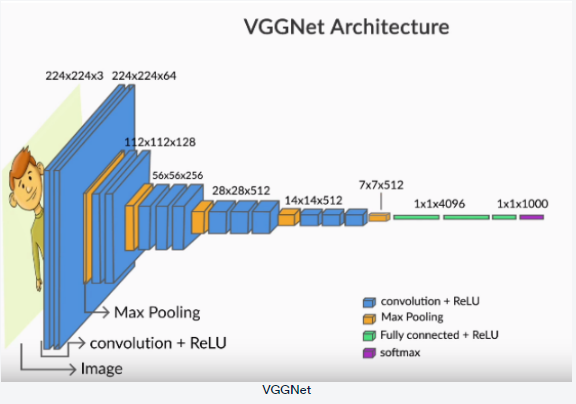